<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec14-PCA.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - principal component analysis (PCA)
---

This is the lecture note for **PCA**, which is used for dimensionality reduction.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to PCA. I encourage you to read further about PCA. </p>

Read more:
- [Prinicipalkomponentanalys - wikipedia](https://sv.wikipedia.org/wiki/Principalkomponentanalys)
- [Egenvärde, egenvektor, egenrum - wikipedia]()
- [PCA - wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [PCA - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [PCA user guide - sklearn](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)
- [PCA - ISLR pp. 497-516](https://www.statlearning.com/)
---


In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

plt.style.use("seaborn-white")

raw_data = load_breast_cancer()
X = raw_data.data
y = raw_data.target

df = pd.DataFrame(X, columns = raw_data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

---
## Curse of dimensionality

Two points picked randomly in a unit square has lower distance than two points picked randomly in a unit cube as there is more space in higher dimensions. This reasoning applies to higher dimensional hypercubes. This means that a new data point has higher probability of being far away from training dataset in higher dimensional dataset, i.e. the model has higher chance of overfitting.  

- one approach is to get more data points for the training set (not always possible)
- another approach is to reduce the number of dimensions

---
### Principal component analysis (PCA)

PCA is an unsupervised learning technique for reducing dimensionality of the data to a lower dimensional representation of that dataset. For example a dataset with computer specifications, the hardware specifications are more important than the color of the computer when it comes to predicting its price. 

Mathematically we do this by finding a linear combination of feature variables with maximal variance and mutually uncorrelated. For feature variables $X_1, \ldots, X_p$ we get 1st principal component $Z_1$ as:

$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2,\ldots, \phi_{p1}X_p$$

, where the loading vector or principal component vector $\vec{\phi_1} = (\phi_{11}, \ldots, \phi_{p1})^T$ is normalized. The objective is hence to find the principal component vectors. These vectors are eigenvectors of the covariance matrix of the feature matrix. The variance explained is represented by the eigenvalues. We want to find principal components that explain most of the variance of the original dataset in order not to lose too much information when reducing dimensions.  

- when we have computed the eigenvectors, we sort them by eigenvalues and pick a number $d$ dimensions to project our data onto.
- the number $d$ can be obtained through a knee plot of the proportional variance explained 
- by reducing number of dimensions we also decreases the amount of data that the model needs to process, and can speed up computations
- very important is that the data is scaled with feature standardization i.e. 0 mean and unit variance

X_train shape: (381, 30)
PCA transformed shape (381, 30)


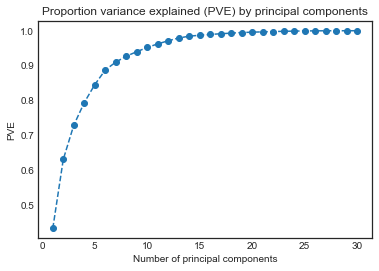

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"X_train shape: {X_train.shape}")
# very important to feature standardize for PCA to work properly, it has to have 0 mean and unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=X.shape[1])
pca_transformations = pca.fit_transform(scaled_X_train)
print(f"PCA transformed shape {pca_transformations.shape}")

proportion_variance_explained = np.cumsum(pca.explained_variance_ratio_)


fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(proportion_variance_explained)+1),
        proportion_variance_explained, 'o--')

ax.set(title="Proportion variance explained (PVE) by principal components",
       xlabel="Number of principal components", ylabel="PVE");

# here we can pick around 6-10 PCs 

---
## Visualize first 2 PCs

- visualize the first 2 principal components 
- with the help of PCA we can visualize high dimensional data

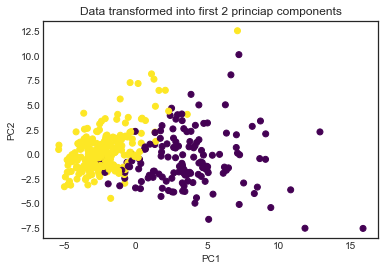

In [59]:
fig, ax = plt.figure(), plt.axes()
ax.scatter(pca_transformations[:,0], pca_transformations[:,1], c = y_train, cmap = "viridis")
ax.set(title = "Data transformed into first 2 princiap components", xlabel = "PC1", ylabel = "PC2");

In [60]:
# explained variance ratio by the first two principal components
# note that although it explains only about 0.63 of all the variance we can see that it is somewhat linearly separable
pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]

0.6305691120532211

---
## PCA in pipeline

- PCA can be used in pipeline where data is first scaled followed by PCA and afterwards a classifier or regressor for regression problem
- some features are correlated and explains very little of the variance, and hence can be represented by lower dimensional principal components

In [85]:
# helper function
def evaluate_model(model, title = ""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred));
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
    plt.title(title)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



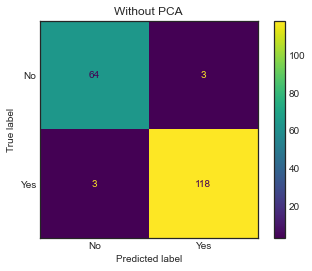

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# we use SVM with linear kernel as we saw that it is linearly separable with the first two PCs
pipe_with_pca = Pipeline([("scaling", StandardScaler()),
                 ("reduce_dimensions", PCA(10)),
                 ("svm", LinearSVC(max_iter = 10000))])

pipe_no_pca = Pipeline([("scaling", StandardScaler()),
                 ("svm", LinearSVC(max_iter = 10000))])

evaluate_model(pipe_no_pca, "Without PCA")


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



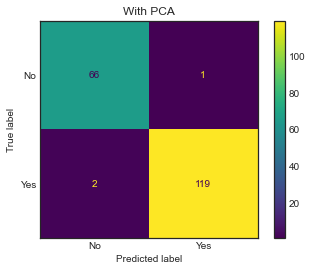

In [87]:
evaluate_model(pipe_with_pca, "With PCA")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
